## K-Means++

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.spatial.distance import euclidean

### load data iris

In [2]:
# load data iris
iris = datasets.load_iris()
x_1 = iris.data[:,0]/iris.data[:,1]
x_2 = iris.data[:,2]/iris.data[:,3]

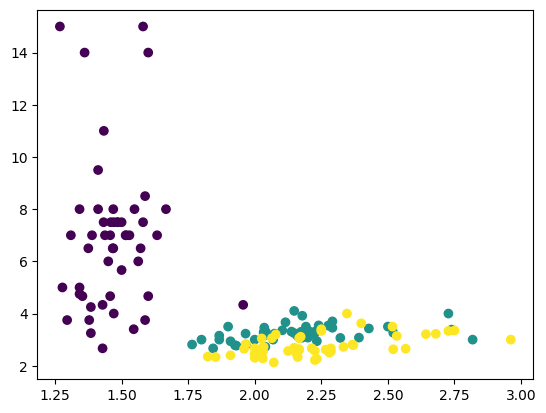

In [3]:
# How the data looks like
# different colors represent different cluster  
plt.scatter(x_1, x_2, c=iris.target)
plt.show()

### input value

In [4]:
# input value

# k: number of cluster you want
k = 5

# max_iter: max number of iteration
max_iter = 50

In [5]:
# X: 150 samples with 2 features
X = np.array([x_1,x_2]).T
X[:5]

array([[1.45714286, 7.        ],
       [1.63333333, 7.        ],
       [1.46875   , 6.5       ],
       [1.48387097, 7.5       ],
       [1.38888889, 7.        ]])

### Algorithm

In [6]:
def cal_distance(X, C):
    # return: the distance from each points to each center points
    
    distances = []

    for i in range(len(C)):
        # euclidean() calculate the euclidean distance of 2 given points
        dist = [euclidean(X[j],C[i]) for j in range(X.shape[0])]
        distances.append(dist)
        
    return distances

In [7]:
def compute_objective(X, C):
    # calculate the min distance from each points to nearest cluster center point
    # return sum of min_distance**2 as objectve value(we want to minimize objective value)
    
    # e.g: if distances = [[1,6,5],[4,2,7]], min_dist will be [1, 2, 5]
    distances = cal_distance(X, C)
    min_dist = np.min(distances,axis = 0)
    
    # L2-norm^2
    return np.sum(min_dist**2)

In [8]:
# init center
# key difference between K_means and K_means++
# for K_means, we just random choose the initial center

# randomly choose the first center
centers = [X[np.random.choice(X.shape[0]),:]]

# choose other k-1 centers
for _ in range(k-1):
        
    distances = cal_distance(X, centers)
    min_dist = np.min(distances,axis = 0)
    
    # the probability of each point be selected proportional with distance from cluster center point
    # which means, the far the distance of each point from center points, 
    # the more the likelihood this point will be chosen   
    prob = min_dist**2 / np.sum(min_dist**2) # Normalization with L2-norm^2
    centers.append(X[np.random.choice(X.shape[0], p=prob)])
    
centers = np.array(centers)

In [9]:
# the first objctive value from the first center points
objs = [compute_objective(X, centers)]


for i in range(1, max_iter):
    
    # calculate the distance from each points to each center points
    distances = cal_distance(X, centers)
    min_dist = np.min(distances,axis = 0)
    
    # e.g: if distances = [[1,6,5],[4,2,7]], min_dist will be [1, 2, 5],
    # then: clusters = [[True, False, True],[False, True, False]]
    # clusters[0] = [True, False, True], 
    # which means the points at position 0 and 2 belongs to cluster 0
    clusters = distances == min_dist
    
    last_centers = centers.copy()
    
    # re-compute center points
    for j, c in enumerate(clusters):
        centers[j] = np.mean(X[c], axis=0)
    
    # (center == last_centers) represents the next center will also be the same center,
    # so we can quit iteration
    if (centers == last_centers).all():
        break
    
    # store history of objective value
    obj = compute_objective(X, centers)    
    objs.append(obj)

### Plot cluster center points K-Means++ predicted 

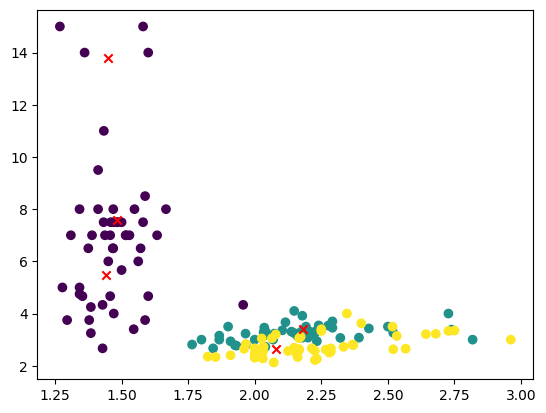

In [10]:
plt.figure(1)

plt.scatter(x_1, x_2, c=iris.target)
plt.scatter(centers[:,0], centers[:,1], c="red",marker='x')

plt.show()

In [11]:
# plot predicted 5 clusters
clusters = 1*clusters
for i, c in enumerate(clusters):
    clusters[i,c==1] = i
clusters = clusters.sum(axis=0)

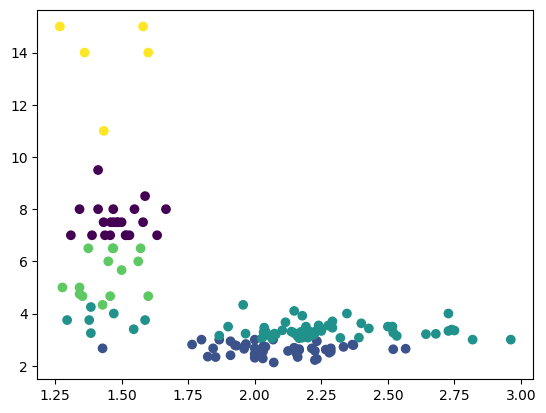

In [12]:
plt.figure(1)

plt.scatter(x_1, x_2, c=clusters)

plt.show()

### Plot objective value for each iteration

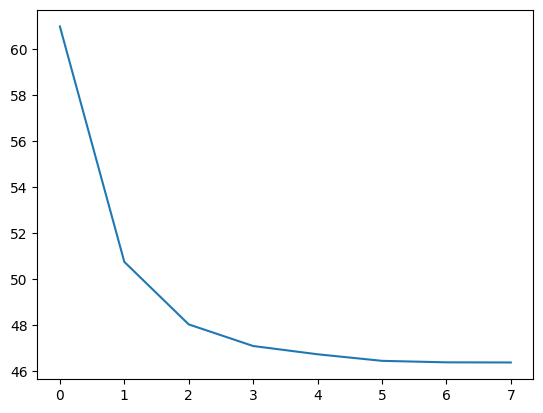

In [13]:
plt.plot(list(range(len(objs))), objs)
plt.show()